In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
# to connect as OAth handler or jump server / revers proxy server
consumerKey = "Type your consumer key here"
consumerSecret = "Type your consumer secret here"

# from proxy server we need to connect
accessToken = "Type your access token here"
accessTokenSecret = "Type your access token secret here"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: lockdown india
Please enter how many tweets to analyze: 2500


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  478
negative number:  363
neutral number:  1659


In [6]:
tweet_list

0
0     RT @its_ssrwarrior: In India, June 2020, was a...
1     @SALMAN286 @Box_Off_India 1 saal lockdown me y...
2     RT @its_ssrwarrior: In India, June 2020, was a...
3     RT @winwithvibhor: I've heard that they will i...
4     London police investigating Downing Street loc...
...                                                 ...
2495  RT @its_ssrwarrior: In India, June 2020, was a...
2496  RT @its_ssrwarrior: In India, June 2020, was a...
2497  @probo_india Lockdown 🌈\n #GiveawayAlert #prob...
2498  In India, June 2020, was a lockdown, so how ca...
2499  Dear @hm India, why is it that every time I wa...

[2500 rows x 1 columns]

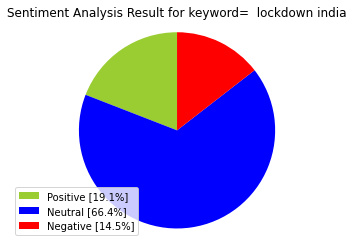

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

0  \
0     RT @its_ssrwarrior: In India, June 2020, was a...   
1     @SALMAN286 @Box_Off_India 1 saal lockdown me y...   
3     RT @winwithvibhor: I've heard that they will i...   
4     London police investigating Downing Street loc...   
6     இந்தியாவில் மெல்ல மெல்ல குறையும் தினசரி கொரோனா...   
...                                                 ...   
2488  #CovidThirdWave is a matter of concern @Mayapu...   
2489  With almost every #film released in movie thea...   
2497  @probo_india Lockdown 🌈\n #GiveawayAlert #prob...   
2498  In India, June 2020, was a lockdown, so how ca...   
2499  Dear @hm India, why is it that every time I wa...   

                                                   text  
0     RT @its_ssrwarrior: In India, June 2020, was a...  
1     @SALMAN286 @Box_Off_India 1 saal lockdown me y...  
3     RT @winwithvibhor: I've heard that they will i...  
4     London police investigating Downing Street loc...  
6     இந்தியாவில் மெல்ல மெல்ல குறையும் தினசரி கொரோனா...  
...                                                 ...  
2488  #CovidThirdWave is a matter of concern @Mayapu...  
2489  With almost every #film released in movie thea...  
2497  @probo_india Lockdown 🌈\n #GiveawayAlert #prob...  
2498  In India, June 2020, was a lockdown, so how ca...  
2499  Dear @hm India, why is it that every time I wa...  

[654 rows x 2 columns]

In [10]:
tweet_list

0  \
0     RT @its_ssrwarrior: In India, June 2020, was a...   
1     @SALMAN286 @Box_Off_India 1 saal lockdown me y...   
3     RT @winwithvibhor: I've heard that they will i...   
4     London police investigating Downing Street loc...   
6     இந்தியாவில் மெல்ல மெல்ல குறையும் தினசரி கொரோனா...   
...                                                 ...   
2488  #CovidThirdWave is a matter of concern @Mayapu...   
2489  With almost every #film released in movie thea...   
2497  @probo_india Lockdown 🌈\n #GiveawayAlert #prob...   
2498  In India, June 2020, was a lockdown, so how ca...   
2499  Dear @hm India, why is it that every time I wa...   

                                                   text  
0     RT @its_ssrwarrior: In India, June 2020, was a...  
1     @SALMAN286 @Box_Off_India 1 saal lockdown me y...  
3     RT @winwithvibhor: I've heard that they will i...  
4     London police investigating Downing Street loc...  
6     இந்தியாவில் மெல்ல மெல்ல குறையும் தினசரி கொரோனா...  
...                                                 ...  
2488  #CovidThirdWave is a matter of concern @Mayapu...  
2489  With almost every #film released in movie thea...  
2497  @probo_india Lockdown 🌈\n #GiveawayAlert #prob...  
2498  In India, June 2020, was a lockdown, so how ca...  
2499  Dear @hm India, why is it that every time I wa...  

[654 rows x 2 columns]

In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

0  \
0   RT @its_ssrwarrior: In India, June 2020, was a...   
1   @SALMAN286 @Box_Off_India 1 saal lockdown me y...   
3   RT @winwithvibhor: I've heard that they will i...   
4   London police investigating Downing Street loc...   
6   இந்தியாவில் மெல்ல மெல்ல குறையும் தினசரி கொரோனா...   
7   RT @adarsh_pan: 614 Deaths due to Covid in the...   
8   @PMOIndia @narendramodi India me corona virus ...   
9   While #lockdown might not be necessary in this...   
10  RT @jananisampath: One country with lesser peo...   
12  RT @Club6pm: Sunday full lockdown in TN. \nman...   

                                                 text  
0    in india  june 2020  was a lockdown  so how c...  
1       off india 1 saal lockdown me ye aalsi 90 s...  
3    i ve heard that they will impose the lockdown...  
4   london police investigating downing street loc...  
6                                                 ...  
7    614 deaths due to covid in the last 24 hrs   ...  
8       india me corona virus bohat he sampurna lo...  
9   while  lockdown might not be necessary in this...  
10   one country with lesser people than chennai g...  
12   sunday full lockdown in tn   many state exams...

In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

0  \
0   RT @its_ssrwarrior: In India, June 2020, was a...   
1   @SALMAN286 @Box_Off_India 1 saal lockdown me y...   
3   RT @winwithvibhor: I've heard that they will i...   
4   London police investigating Downing Street loc...   
6   இந்தியாவில் மெல்ல மெல்ல குறையும் தினசரி கொரோனா...   
7   RT @adarsh_pan: 614 Deaths due to Covid in the...   
8   @PMOIndia @narendramodi India me corona virus ...   
9   While #lockdown might not be necessary in this...   
10  RT @jananisampath: One country with lesser peo...   
12  RT @Club6pm: Sunday full lockdown in TN. \nman...   

                                                 text  polarity  subjectivity  \
0    in india  june 2020  was a lockdown  so how c... -0.050000      0.100000   
1       off india 1 saal lockdown me ye aalsi 90 s...  0.000000      0.000000   
3    i ve heard that they will impose the lockdown...  0.000000      0.000000   
4   london police investigating downing street loc...  0.000000      0.000000   
6                                                 ...  0.000000      0.000000   
7    614 deaths due to covid in the last 24 hrs   ... -0.062500      0.220833   
8       india me corona virus bohat he sampurna lo...  0.000000      0.000000   
9   while  lockdown might not be necessary in this...  0.250000      0.750000   
10   one country with lesser people than chennai g... -0.062500      0.437500   
12   sunday full lockdown in tn   many state exams...  0.283333      0.350000   

   sentiment    neg    neu    pos  compound  
0   positive  0.092  0.795  0.113    0.1280  
1    neutral  0.000  1.000  0.000    0.0000  
3   negative  0.107  0.829  0.063   -0.2263  
4   positive  0.000  0.769  0.231    0.4019  
6    neutral  0.000  1.000  0.000    0.0000  
7   negative  0.217  0.783  0.000   -0.7269  
8    neutral  0.000  1.000  0.000    0.0000  
9   positive  0.000  0.870  0.130    0.2732  
10   neutral  0.000  1.000  0.000    0.0000  
12   neutral  0.000  1.000  0.000    0.0000

In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

Total  Percentage
neutral     269       41.13
positive    244       37.31
negative    141       21.56

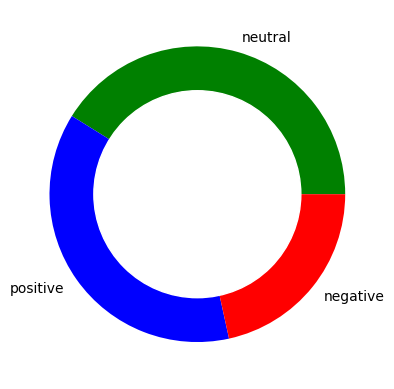

In [17]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


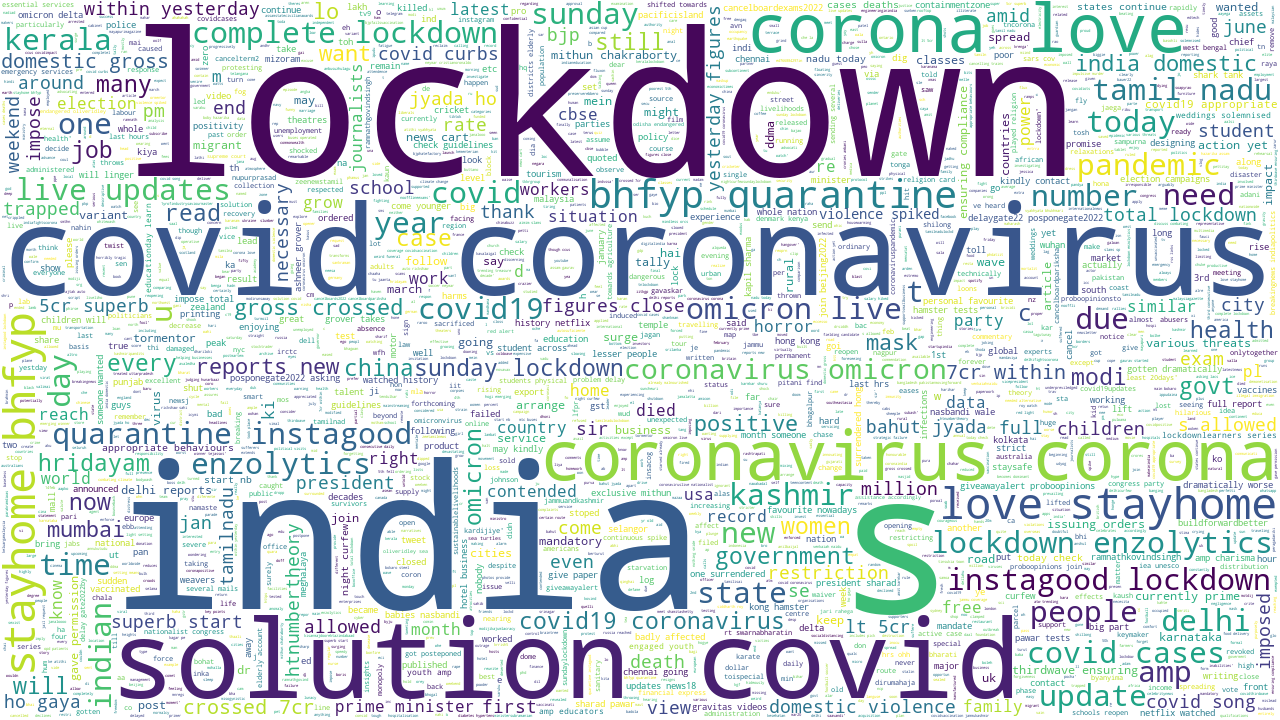

In [20]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


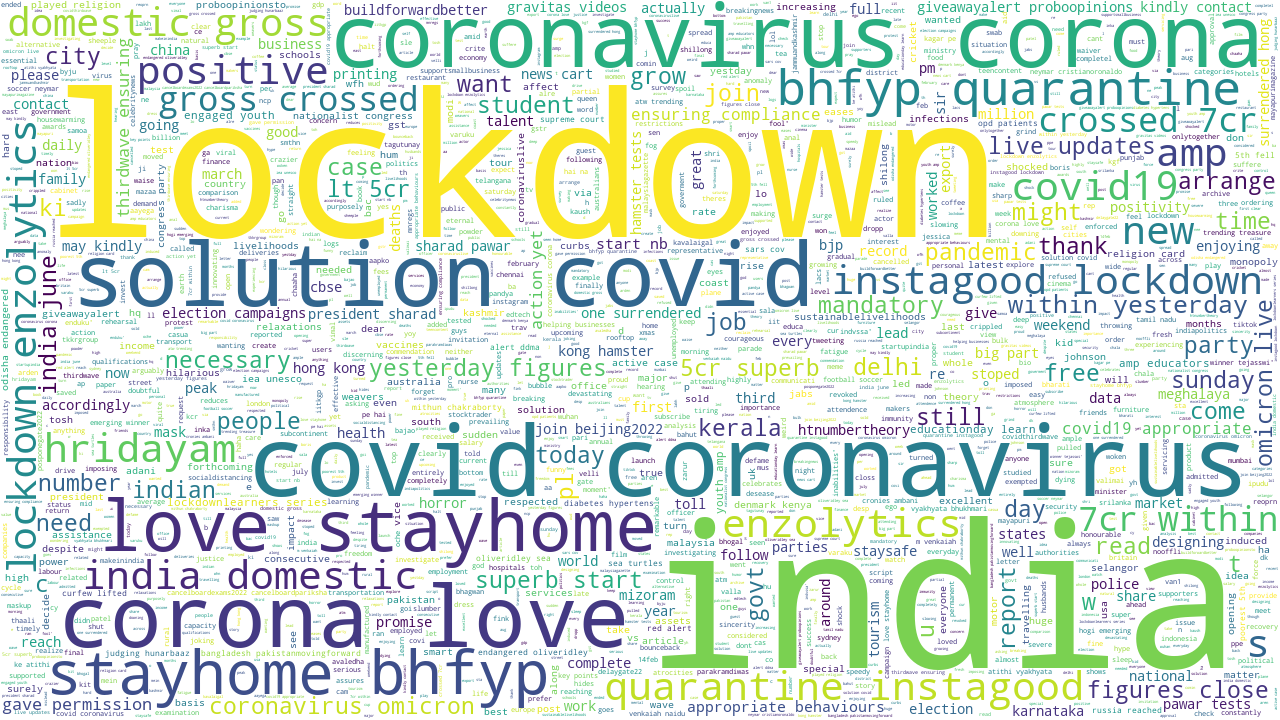

In [22]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


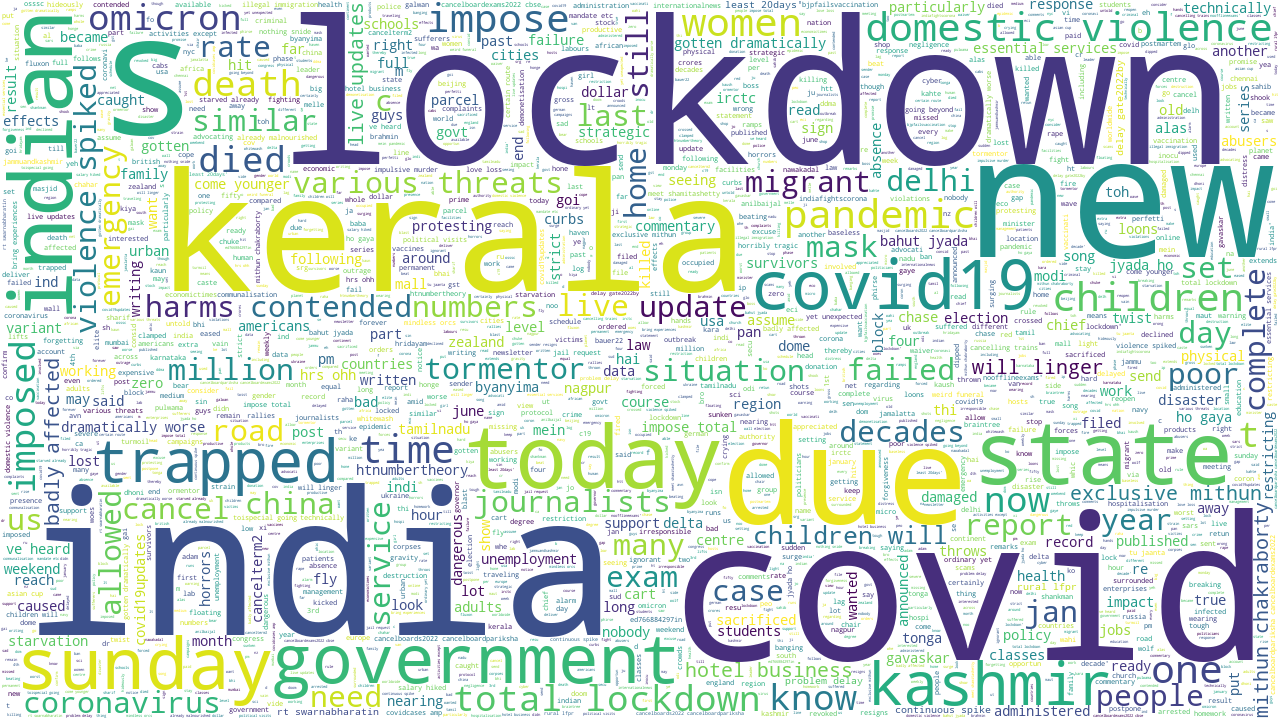

In [23]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


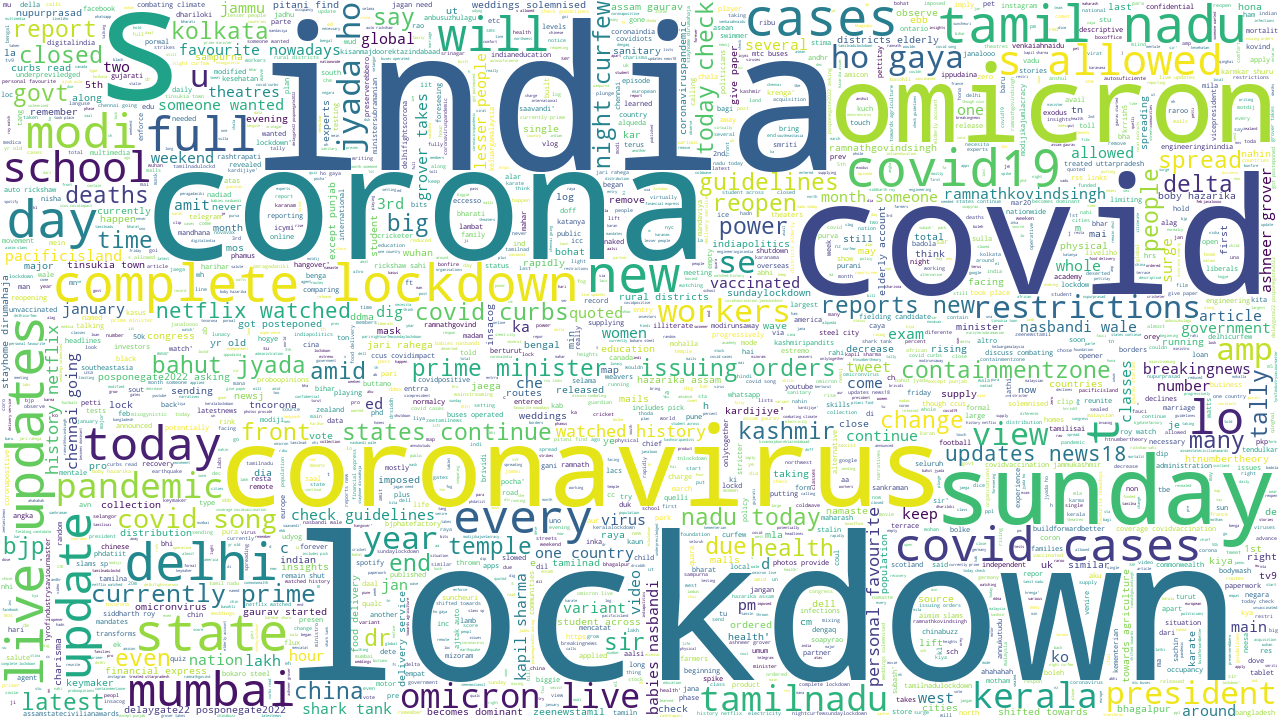

In [24]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [25]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [26]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

text_len
sentiment          
negative     106.55
neutral       98.49
positive     107.52

In [27]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

text_word_count
sentiment                 
negative             17.38
neutral              11.94
positive             15.41

In [28]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [29]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [30]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [31]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [32]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [33]:
tw_list.head()

0  \
0  RT @its_ssrwarrior: In India, June 2020, was a...   
1  @SALMAN286 @Box_Off_India 1 saal lockdown me y...   
3  RT @winwithvibhor: I've heard that they will i...   
4  London police investigating Downing Street loc...   
6  இந்தியாவில் மெல்ல மெல்ல குறையும் தினசரி கொரோனா...   

                                                text  polarity  subjectivity  \
0   in india  june 2020  was a lockdown  so how c...     -0.05           0.1   
1      off india 1 saal lockdown me ye aalsi 90 s...      0.00           0.0   
3   i ve heard that they will impose the lockdown...      0.00           0.0   
4  london police investigating downing street loc...      0.00           0.0   
6                                                ...      0.00           0.0   

  sentiment    neg    neu    pos  compound  text_len  text_word_count  \
0  positive  0.092  0.795  0.113    0.1280       121               24   
1   neutral  0.000  1.000  0.000    0.0000        84               18   
3  negative  0.107  0.829  0.063   -0.2263       122               21   
4  positive  0.000  0.769  0.231    0.4019        78               10   
6   neutral  0.000  1.000  0.000    0.0000       110                6   

                                               punct  \
0   in india  june   was a lockdown  so how can t...   
1      off india  saal lockdown me ye aalsi  s ka...   
3   i ve heard that they will impose the lockdown...   
4  london police investigating downing street loc...   
6                                                ...   

                                           tokenized  \
0  [, in, india, june, was, a, lockdown, so, how,...   
1  [, off, india, saal, lockdown, me, ye, aalsi, ...   
3  [, i, ve, heard, that, they, will, impose, the...   
4  [london, police, investigating, downing, stree...   
6  [, newsj, india, corona, omicron, decrease, lo...   

                                             nonstop  \
0  [, india, june, lockdown, arrange, party, gave...   
1  [, india, saal, lockdown, ye, aalsi, ka, data,...   
3  [, heard, impose, lockdowns, post, elections, ...   
4  [london, police, investigating, downing, stree...   
6  [, newsj, india, corona, omicron, decrease, lo...   

                                             stemmed  
0  [, india, june, lockdown, arrang, parti, gave,...  
1  [, india, saal, lockdown, ye, aalsi, ka, data,...  
3  [, heard, impos, lockdown, post, elect, want, ...  
4  [london, polic, investig, down, street, lockdo...  
6  [, newsj, india, corona, omicron, decreas, loc...

In [34]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

654 Number of reviews has 1756 words


In [35]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aalsi  aapko  aayega  ab  abhi  abl  absenc  abus  ...  youtub  yoy  \
0  2   0      0      0       0   0     0    0       0     0  ...       0    0   
1  1   0      1      0       0   1     0    0       0     0  ...       0    0   
2  2   0      0      0       0   0     0    0       0     0  ...       0    0   
3  1   0      0      0       0   0     0    0       0     0  ...       0    0   
4  2   0      0      0       0   0     0    0       0     0  ...       0    0   

   yr  yrofindustrysaviourmast  zarur  zealand  zeenewstamil  zeetamilnew  \
0   0                        0      0        0             0            0   
1   0                        0      0        0             0            0   
2   0                        0      0        0             0            0   
3   0                        0      0        0             0            0   
4   0                        0      0        0             0            0   

   zero  zone  
0     0     0  
1     0     0  
2     0     0  
3     0     0  
4     0     0  

[5 rows x 1756 columns]

In [36]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

0
lockdown    368
india       305
covid       224
coronaviru  112
corona      104
love         66
stayhom      65
solut        63
enzolyt      61
bhfyp        59

In [37]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('covid coronavirus', 65),
 ('enzolytics solution', 61),
 ('solution covid', 61),
 ('coronavirus corona', 61),
 ('corona love', 61),
 ('love stayhome', 59),
 ('stayhome bhfyp', 58),
 ('bhfyp quarantine', 56),
 ('quarantine instagood', 51),
 ('covid 19', 49),
 ('instagood lockdown', 46),
 ('live updates', 27),
 ('complete lockdown', 24),
 ('tamil nadu', 19),
 ('india lockdown', 18),
 ('sunday lockdown', 16),
 ('omicron live', 14),
 ('coronavirus omicron', 14),
 ('covid cases', 13),
 ('covid19 coronavirus', 12)]

In [39]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('enzolytics solution covid', 61),
 ('covid coronavirus corona', 61),
 ('solution covid coronavirus', 60),
 ('coronavirus corona love', 60),
 ('corona love stayhome', 59),
 ('love stayhome bhfyp', 58),
 ('stayhome bhfyp quarantine', 56),
 ('bhfyp quarantine instagood', 51),
 ('quarantine instagood lockdown', 46),
 ('omicron live updates', 14),
 ('covid19 coronavirus omicron', 12),
 ('coronavirus omicron live', 12),
 ('hridayam india domestic', 10),
 ('india domestic gross', 10),
 ('domestic gross crossed', 10),
 ('gross crossed 7cr', 10),
 ('crossed 7cr yesterday', 10),
 ('7cr yesterday figures', 10),
 ('jyada ho gaya', 9),
 ('india covid 19', 8)]